**Análisis del Conjunto de Datos de Predicción de Diabetes**

El análisis del conjunto de datos de predicción de diabetes presenta una valiosa oportunidad para comprender y predecir los factores que contribuyen al desarrollo de esta enfermedad crónica. Este conjunto de datos proporciona información sobre diversos atributos de las personas, como la edad, el IMC, el género y los niveles de glucosa en la sangre, entre otros.

La motivación detrás de este análisis radica en la necesidad de identificar patrones y relaciones entre estas variables con el fin de desarrollar mejores estrategias de prevención y tratamiento de la diabetes. Al comprender los factores de riesgo, como la hipertensión, el IMC (BMI) y los niveles de glucosa, podemos mejorar la detección temprana y personalizar la atención médica para aquellos en riesgo.

Este análisis beneficiará a una amplia audiencia, incluyendo profesionales de la salud, investigadores, expertos en salud pública y responsables de la formulación de políticas. Los profesionales de la salud podrán utilizar los resultados para mejorar el asesoramiento y la educación de los pacientes, así como para identificar grupos de alto riesgo que requieran intervenciones específicas. Los investigadores podrán aprovechar los hallazgos para desarrollar modelos de predicción más precisos y guiar investigaciones futuras sobre los factores subyacentes a la diabetes. Los responsables de la formulación de políticas y expertos en salud pública podrán utilizar los resultados para diseñar programas de prevención y promoción de la salud dirigidos a la población en general.

En resumen, el análisis de este conjunto de datos sobre predicción de diabetes tiene como objetivo proporcionar conocimientos clave sobre los factores de riesgo y las características asociadas a esta enfermedad, con el fin de mejorar la prevención, el diagnóstico y el tratamiento, y así beneficiar a profesionales de la salud, investigadores y responsables de la formulación de políticas en el campo de la diabetes y la salud pública en general.




**Fuente de Datos Original:**
[Kaggle - Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)


**Descripción de Variables:**

| Variable              | Descripción                              |
|-----------------------|------------------------------------------|
| gender                | Género                                   |
| age                   | Edad                                     |
| heart_disease         | Ha padecido de un infarto                |
| smoking_history       | Historial de fumador                     |
| bmi                   | Índice de Masa Corporal (BMI)            |
| HbA1c_level           | Nivel de Hemoglobina en la Sangre        |
| blood_glucose_level   | Nivel de Glucosa en la Sangre            |
| diabetes              | Tiene Diabetes                            |


### Preparación del Ambiente de Trabajo

A continuación, prepararemos nuestro ambiente de trabajo: importaremos las librerías necesarias para nuestro análisis y cargaremos los datos.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset

df = pd.read_csv("diabetes.csv", delimiter = ',')
print(f"Observaciones : {df.shape[0]:,}")
print(f"Columnas      : {df.shape[1]}")

Observaciones : 100,000
Columnas      : 9


In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# Usamos info para detectar si hay nulos en nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [29]:
# Itera a través de las columnas del DataFrame
for col in df.columns:
    # Calcula y muestra la cantidad de cada valor en la columna
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("\n")

Columna: gender
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


Columna: age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64


Columna: hypertension
0    92515
1     7485
Name: hypertension, dtype: int64


Columna: heart_disease
0    96058
1     3942
Name: heart_disease, dtype: int64


Columna: smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


Columna: bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64


Columna: HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5  

In [9]:
# Mover las columnas binarias en las columnas numéricas a la lista de columnas categóricas para el EDA
cat_cols += ["diabetes", "hypertension", "heart_disease"]

# Actualizar la lista de columnas numéricas
num_cols = [x for x in num_cols if x not in ["diabetes", "hypertension", "heart_disease"]]

# Mostrar las columnas actualizadas
print("Columnas Categóricas:")
print(cat_cols)
print("\nColumnas Numéricas:")
print(num_cols)


Columnas Categóricas:
['gender', 'smoking_history', 'diabetes', 'hypertension', 'heart_disease']

Columnas Numéricas:
['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


**Inferencia**

Tenemos solo 5 columnas categóricas y 4 columnas numéricas.


In [34]:
# función para detectar caracteres especiales
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(df[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - gender
----------------------------------------------------------------------------------------------------
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - smoking_history
----------------------------------------------------------------------------------------------------
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - diabetes
----------------------------------------------------------------------------------------------------
0    91500
1     8500
Name: diabetes, dtype: int64
--------------------------------

**Resultado del Análisis**

- No se encontraron caracteres especiales ni motivos para eliminar alguna columna en nuestro DataFrame.

In [10]:
# Analisis descriptivo
df[num_cols].describe().round(2)

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.00,100000.00,100000.00,100000.00
mean,41.89,27.32,5.53,138.06
std,22.52,6.64,1.07,40.71
min,0.08,10.01,3.50,80.00
25%,24.00,23.63,4.80,100.00
50%,43.00,27.32,5.80,140.00
75%,60.00,29.58,6.20,159.00
max,80.00,95.69,9.00,300.00


**Inferencia**

- **Edad (Age):** La edad promedio es de 41.89 años, con una mediana de 43 años, lo que sugiere una distribución de edad relativamente equilibrada en el conjunto de datos.

- **Hipertensión (Hypertension) y Enfermedad Cardíaca (Heart Disease):** La mayoría de las personas no tienen hipertensión ni enfermedad cardíaca, con valores bajos en ambas columnas.

- **Índice de Masa Corporal (BMI):** El valor promedio del índice de masa corporal es de 27.32, indicando una tendencia hacia el sobrepeso en promedio.

- **Nivel de HbA1c (HbA1c Level) y Nivel de Glucosa en Sangre (Blood Glucose Level):** Los valores promedio para ambos indicadores están dentro de rangos normales.

- **Diabetes:** Alrededor del 8% de las personas tienen diabetes en el conjunto de datos, mientras que el 92% no la tienen.


In [11]:
#No hay valores nulos
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<AxesSubplot: xlabel='diabetes', ylabel='age'>

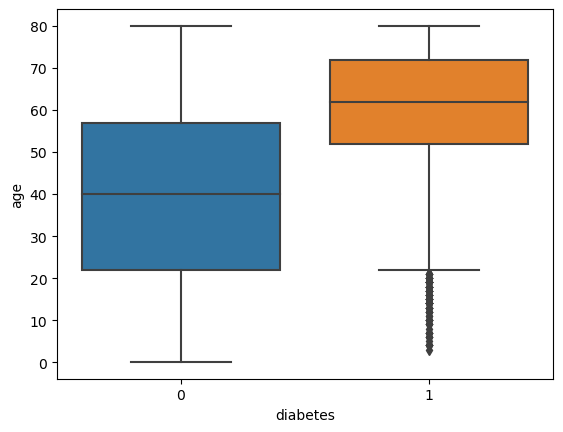

In [12]:
# Columna - age
sns.boxplot(x = df['diabetes'], y = df['age'])

<AxesSubplot: xlabel='age', ylabel='Count'>

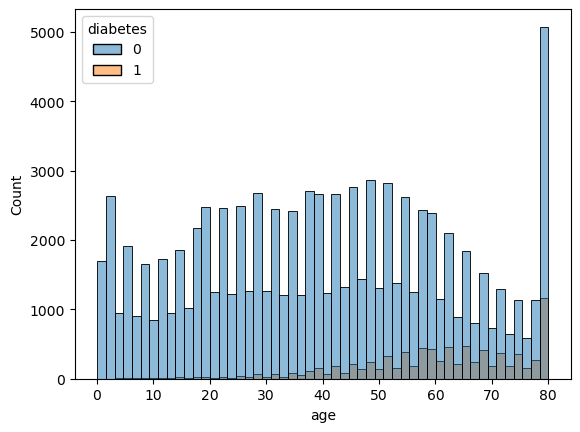

In [13]:
sns.histplot(x = df['age'], hue = df['diabetes'])

**Inferencia**

- La media de edad de las personas que tienen diabetes es mas alta que la de las personas que no la tienen.

- El rango de edad de las personas que tienen diabetes es mas alto que el rango de las personas que no la tienen.

<AxesSubplot: xlabel='diabetes', ylabel='bmi'>

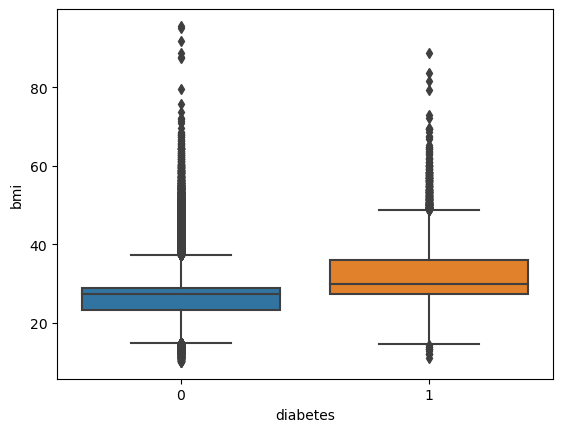

In [14]:
# Columna - bmi
sns.boxplot(x = df['diabetes'], y = df['bmi'])

<AxesSubplot: xlabel='bmi', ylabel='Count'>

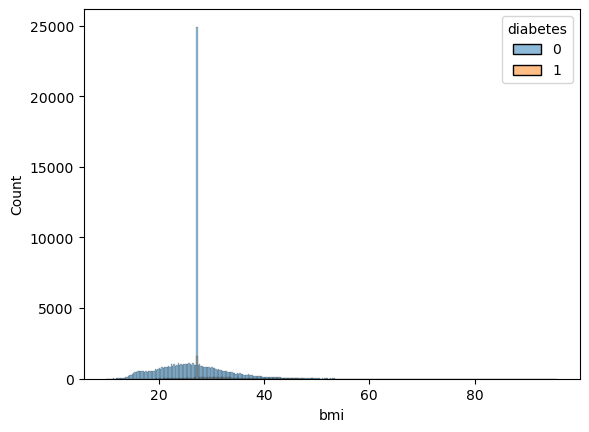

In [15]:
sns.histplot(x = df['bmi'], hue = df['diabetes'])

**Inferencia**

- No existe gran diferencia entre la media del bmi de las personas que tienen diabetes y que no la tienen.

- El rango de bmi de las personas que tienen diabetes es mas alto que el rango de las personas que no la tienen.

<AxesSubplot: xlabel='diabetes', ylabel='HbA1c_level'>

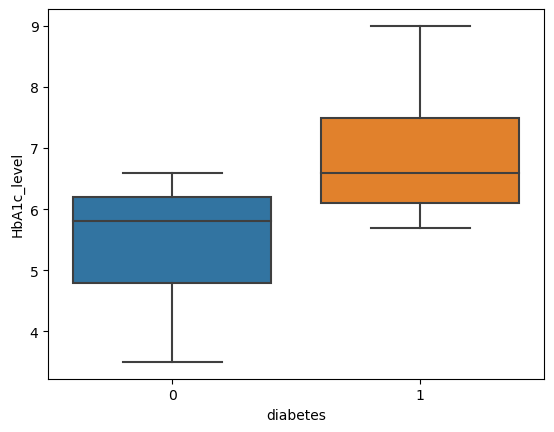

In [16]:
# Columna - HbA1c_level
sns.boxplot(x = df['diabetes'], y = df['HbA1c_level'])

**Inferencia**

- La media del 'HbA1c_level' de las personas que tienen diabetes es mas alta de quienes no tienen diabetes.

- El rango de 'HbA1c_level' de las personas que tienen diabetes es mas alto que el rango de las personas que no la tienen.

<AxesSubplot: xlabel='HbA1c_level', ylabel='Count'>

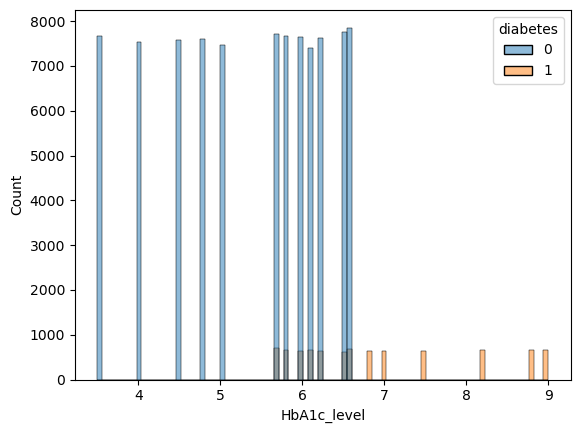

In [17]:
sns.histplot(x = df['HbA1c_level'], hue = df['diabetes'])

**Inferencia**

- Se aprecia que las personas con diabetes tienen un 'HbA1c_level' sobre 5 en todos los casos.

<AxesSubplot: xlabel='diabetes', ylabel='blood_glucose_level'>

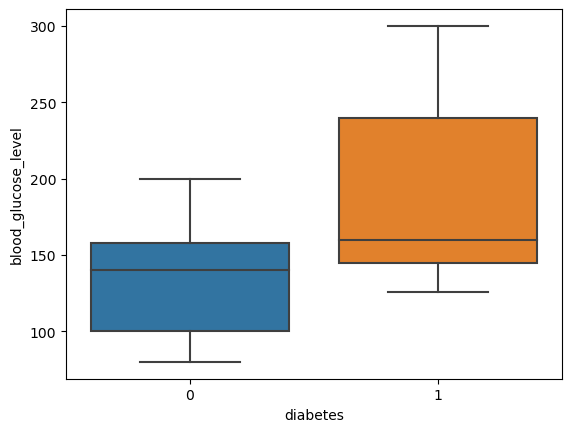

In [18]:
# Columna - blood_glucose_level
sns.boxplot(x = df['diabetes'], y = df['blood_glucose_level'])

**Inferencia**

- La media del 'blood_glucose_level' de las personas que tienen diabetes es mas alta de quienes no tienen diabetes.

- El rango de 'blood_glucose_level' de las personas que tienen diabetes es mas alto que el rango de las personas que no la tienen.

<AxesSubplot: xlabel='blood_glucose_level', ylabel='Count'>

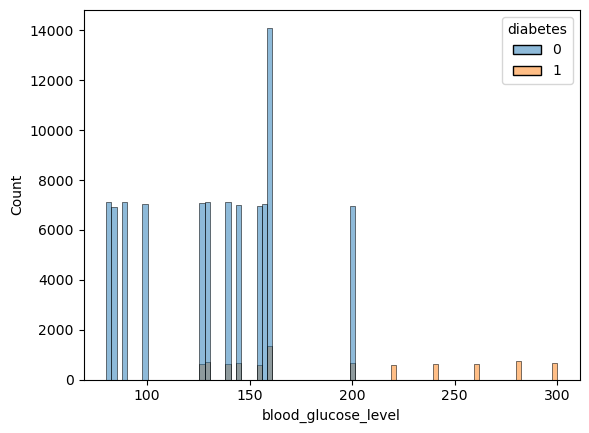

In [19]:
sns.histplot(x = df['blood_glucose_level'], hue = df['diabetes'])

In [20]:
# Función para realizar una prueba de chi-cuadrado entre una característica categórica y la característica objetivo.
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [21]:
# Función para trazar un gráfico de barras apiladas entre una característica categórica y la variable objetivo, que también nos ayuda a identificar la variable dependiente utilizando la función chi-cuadrado. Este paso es la selección de características.
def cat_col_test(df, cat_colname, target_colname):
    
    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

Column name - gender
p value is 7.953383718307459e-32
Both variables are Dependent (reject H0)


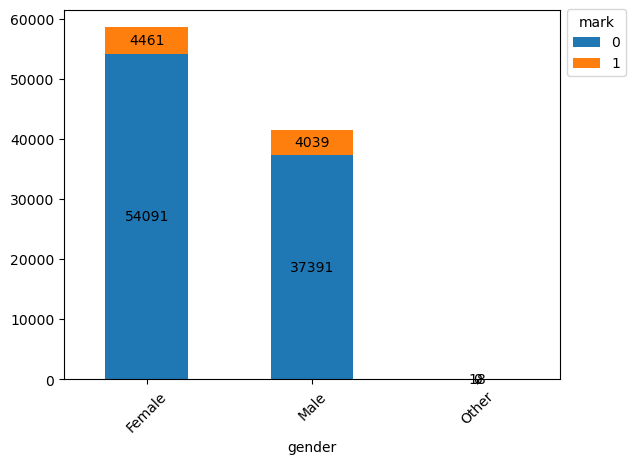

Column name - smoking_history
p value is 0.0
Both variables are Dependent (reject H0)


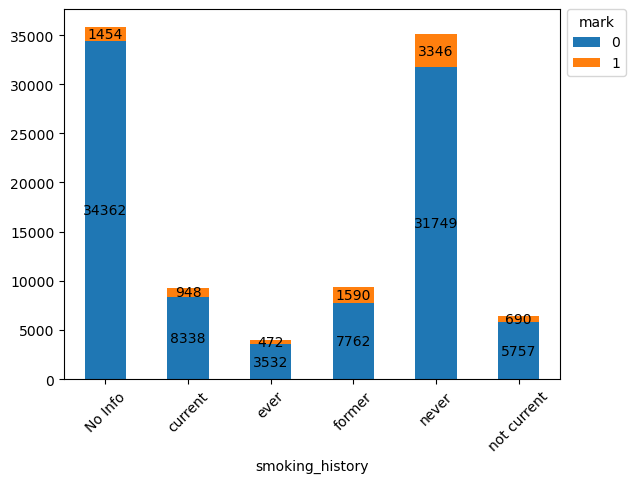

Column name - diabetes
p value is 0.0
Both variables are Dependent (reject H0)


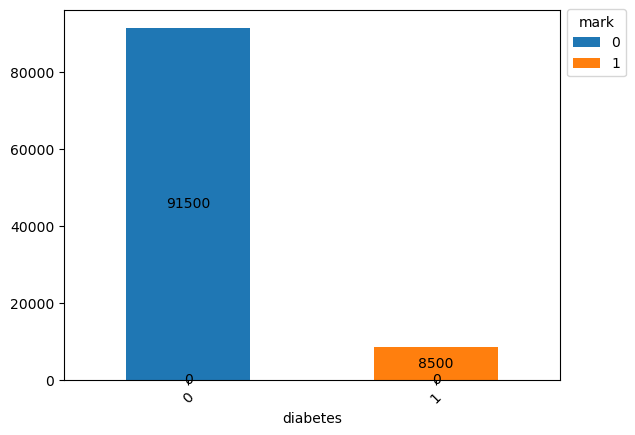

Column name - hypertension
p value is 0.0
Both variables are Dependent (reject H0)


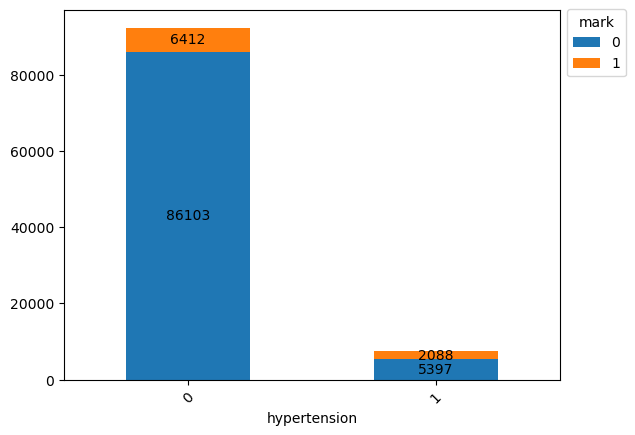

Column name - heart_disease
p value is 0.0
Both variables are Dependent (reject H0)


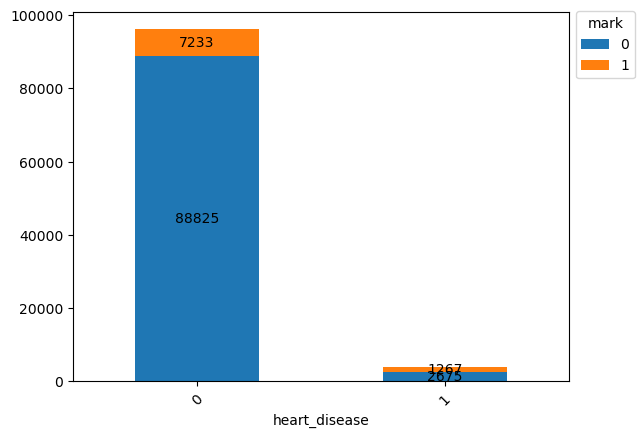

In [22]:
for c in cat_cols:
    cat_col_test(df, c, 'diabetes')

**Inferencia**

- Se concluye que todas las variables revisadas son dependientes de la variable objetivo, lo que significa que existe una relación significativa entre ellas y se rechaza la hipótesis nula (H0).

In [23]:
# Crear una nueva columna 'grupo_de_edad' basada en la columna 'age'
bins = [0, 29, 60, df['age'].max()]
labels = ['joven', 'adulto', 'anciano']

df['grupo_de_edad'] = pd.cut(df['age'], bins=bins, labels=labels)

In [24]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,grupo_de_edad
0,Female,80.0,0,1,never,25.19,6.6,140,0,anciano
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,adulto
2,Male,28.0,0,0,never,27.32,5.7,158,0,joven
3,Female,36.0,0,0,current,23.45,5.0,155,0,adulto
4,Male,76.0,1,1,current,20.14,4.8,155,0,anciano


<Figure size 800x600 with 0 Axes>

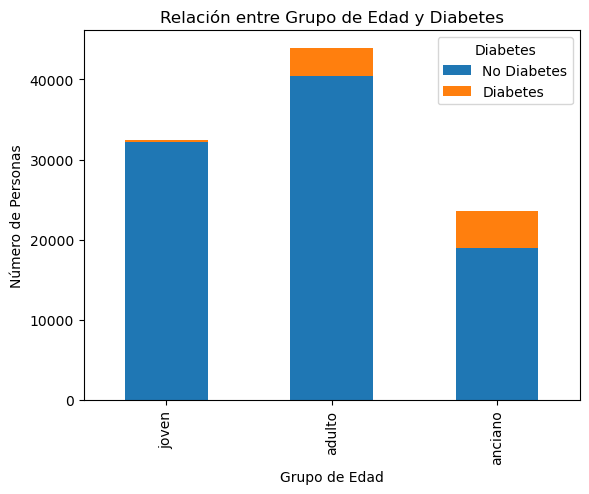

In [32]:
# Creamos un gráfico de barras que muestra la relación entre grupo_de_edad y diabetes
plt.figure(figsize=(8, 6))
df.groupby(['grupo_de_edad', 'diabetes']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Personas')
plt.title('Relación entre Grupo de Edad y Diabetes')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

**Inferencia**

- Existe una mayor cantidad de personas con diabetes en los grupos de adultos y ancianos en comparacion del grupo joven.

In [25]:
# Transformamos nuestras columnas categoricas
columnas_categoricas = ["gender", "smoking_history", "grupo_de_edad"]

# Aplicamos codificación one-hot a las columnas categóricas
df_dummies = pd.get_dummies(df, columns=columnas_categoricas)

In [26]:
df_dummies.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,grupo_de_edad_joven,grupo_de_edad_adulto,grupo_de_edad_anciano
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0,1,0,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0,0,1,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0,0,0,1


In [31]:
# Calcular la matriz de correlación
correlation_matrix = df_dummies.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                                  age  hypertension  heart_disease       bmi  \
age                          1.000000      0.251171       0.233354  0.337396   
hypertension                 0.251171      1.000000       0.121262  0.147666   
heart_disease                0.233354      0.121262       1.000000  0.061198   
bmi                          0.337396      0.147666       0.061198  1.000000   
HbA1c_level                  0.101354      0.080939       0.067589  0.082997   
blood_glucose_level          0.110672      0.084429       0.070066  0.091261   
diabetes                     0.258008      0.197823       0.171727  0.214357   
gender_Female                0.030480     -0.014318      -0.077832  0.023016   
gender_Male                 -0.030282      0.014423       0.077911 -0.023021   
gender_Other                -0.007348     -0.003816      -0.002718  0.000119   
smoking_history_No Info     -0.276945     -0.117210      -0.052398 -0.222553   
smoking_history_current      0.030946   

In [35]:
# Elimina las columnas de los grupos de edad del DataFrame df_dummies
df_dummies = df_dummies.drop(["grupo_de_edad_joven", "grupo_de_edad_adulto", "grupo_de_edad_anciano"], axis=1)

**Inferencia**

- Se eliminan los grupos de edad por su alta correlación con el resto de las variables.

In [42]:
df_dummies.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [46]:
df_dummies_sin_outliers = df_dummies

# Define una función para eliminar los outliers basados en IQR
def remove_outliers_iqr(df_dummies_sin_outliers, column_name):
    Q1 = df_dummies_sin_outliers[column_name].quantile(0.25)
    Q3 = df_dummies_sin_outliers[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_dummies_sin_outliers[(df_dummies_sin_outliers[column_name] >= lower_bound) & (df_dummies_sin_outliers[column_name] <= upper_bound)]

# Lista de columnas en las que deseas eliminar outliers
columns_to_remove_outliers = ['bmi']

# Elimina outliers en las columnas seleccionadas
for column in columns_to_remove_outliers:
    data_sin_outliers = remove_outliers_iqr(df_dummies_sin_outliers, column)



**Inferencia**

- tenemos el datafreme sin outliers 'data_sin_outliers' y el data frame con outliers 'df_dummies'

In [48]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y la variable objetivo (y)
X = df_dummies.drop('diabetes', axis=1)
y = df_dummies['diabetes']

X_SO = data_sin_outliers.drop('diabetes', axis=1)
y_SO = data_sin_outliers['diabetes']

# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_SO, X_test_SO, y_train_SO, y_test_SO = train_test_split(X_SO, y_SO, test_size=0.2, random_state=42)

In [39]:
pip install xgboost


     ---------------------------------------- 99.7/99.7 MB 4.2 MB/s eta 0:00:00


In [49]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define los modelos que deseas evaluar
models = [
    ("Regresión Logística", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier())
]

# Define la cantidad de "folds" para la validación cruzada
n_folds = 3

# Toma una muestra más pequeña de tus datos para acelerar la evaluación
sample_size = 0.2  # Puedes ajustar esto si es necesario

# Realiza validación cruzada para cada modelo y muestra las métricas
for name, model in models:
    print(f"Modelo: {name}")
    scores = cross_val_score(model, X_train.sample(frac=sample_size), y_train.sample(frac=sample_size), cv=n_folds)
    print(f"Puntuaciones de Validación Cruzada: {scores}")
    print(f"Puntuación Media de Validación Cruzada: {np.mean(scores)}")

    # Entrena y evalúa el modelo en el conjunto de prueba
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcula métricas de evaluación en el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Precisión en conjunto de prueba: {precision}")
    print(f"Recall en conjunto de prueba: {recall}")
    print(f"F1-Score en conjunto de prueba: {f1}")
    print("\n")


Modelo: Regresión Logística
Puntuaciones de Validación Cruzada: [0.91619798 0.91618226 0.91618226]
Puntuación Media de Validación Cruzada: 0.9161874993452558
Precisión en conjunto de prueba: 0.8477157360406091
Recall en conjunto de prueba: 0.5866510538641686
F1-Score en conjunto de prueba: 0.6934256055363321


Modelo: Random Forest
Puntuaciones de Validación Cruzada: [0.91319835 0.91411963 0.91261954]
Puntuación Media de Validación Cruzada: 0.9133125071348079
Precisión en conjunto de prueba: 0.9467741935483871
Recall en conjunto de prueba: 0.6873536299765808
F1-Score en conjunto de prueba: 0.7964721845318861


Modelo: SVM
Puntuaciones de Validación Cruzada: [0.91432321 0.91449466 0.91449466]
Puntuación Media de Validación Cruzada: 0.9144375071435965
Precisión en conjunto de prueba: 1.0
Recall en conjunto de prueba: 0.3729508196721312
F1-Score en conjunto de prueba: 0.5432835820895523


Modelo: XGBoost
Puntuaciones de Validación Cruzada: [0.91301087 0.912057   0.91111944]
Puntuación Med

In [50]:
# Define los modelos que deseas evaluar
models = [
    ("Regresión Logística", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier())
]

# Define la cantidad de "folds" para la validación cruzada
n_folds = 3

# Toma una muestra más pequeña de tus datos para acelerar la evaluación
sample_size = 0.2  # Puedes ajustar esto si es necesario

# Realiza validación cruzada para cada modelo y muestra las métricas en el conjunto SO
for name, model in models:
    print(f"Modelo: {name} - Conjunto SO")
    scores = cross_val_score(model, X_train_SO.sample(frac=sample_size), y_train_SO.sample(frac=sample_size), cv=n_folds)
    print(f"Puntuaciones de Validación Cruzada: {scores}")
    print(f"Puntuación Media de Validación Cruzada: {np.mean(scores)}")

    # Entrena y evalúa el modelo en el conjunto de prueba SO
    model.fit(X_train_SO, y_train_SO)
    y_pred_SO = model.predict(X_test_SO)
    
    # Calcula métricas de evaluación en el conjunto de prueba SO
    accuracy_SO = accuracy_score(y_test_SO, y_pred_SO)
    precision_SO = precision_score(y_test_SO, y_pred_SO)
    recall_SO = recall_score(y_test_SO, y_pred_SO)
    f1_SO = f1_score(y_test_SO, y_pred_SO)
    
    print(f"Precisión en conjunto de prueba SO: {precision_SO}")
    print(f"Recall en conjunto de prueba SO: {recall_SO}")
    print(f"F1-Score en conjunto de prueba SO: {f1_SO}")
    print("\n")

Modelo: Regresión Logística - Conjunto SO
Puntuaciones de Validación Cruzada: [0.92433414 0.92452069 0.92431887]
Puntuación Media de Validación Cruzada: 0.924391232146624
Precisión en conjunto de prueba SO: 0.8557114228456913
Recall en conjunto de prueba SO: 0.6215429403202329
F1-Score en conjunto de prueba SO: 0.7200674536256324


Modelo: Random Forest - Conjunto SO
Puntuaciones de Validación Cruzada: [0.9188862  0.92129162 0.91907164]
Puntuación Media de Validación Cruzada: 0.9197498226573463
Precisión en conjunto de prueba SO: 0.9525731584258325
Recall en conjunto de prueba SO: 0.6870451237263464
F1-Score en conjunto de prueba SO: 0.7983086680761099


Modelo: SVM - Conjunto SO
Puntuaciones de Validación Cruzada: [0.92150928 0.92149344 0.92149344]
Puntuación Media de Validación Cruzada: 0.9214987212054034
Precisión en conjunto de prueba SO: 1.0
Recall en conjunto de prueba SO: 0.3544395924308588
F1-Score en conjunto de prueba SO: 0.523374529822676


Modelo: XGBoost - Conjunto SO
Punt

**Inferencia**

- Segun el analisis y en vista del desequilibrio de clases en conjunto con la importancia de detectar falsos positivos, el modelo que se ajusta mas a nuestros requerimientos es el xGboost en nuestro conjunto sin outliers (SO) ya que nos da el accuracy mas alto (0.95) y el f1-score mas alto (0.801)

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Define el modelo XGBoost
xgb_model = XGBClassifier()

# Define los hiperparámetros que deseas sintonizar
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Realiza la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=10,
    scoring='accuracy', cv=5, random_state=42, n_jobs=-1
)

# Ajusta el modelo a los datos
random_search.fit(X_train_SO, y_train_SO)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en el conjunto de prueba
y_pred = random_search.best_estimator_.predict(X_test_SO)
accuracy = accuracy_score(y_test_SO, y_pred)
precision = precision_score(y_test_SO, y_pred)
recall = recall_score(y_test_SO, y_pred)
f1 = f1_score(y_test_SO, y_pred)

print(f"Precisión en conjunto de prueba: {precision}")
print(f"Recall en conjunto de prueba: {recall}")
print(f"F1-Score en conjunto de prueba: {f1}")


Mejores hiperparámetros encontrados:
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Precisión en conjunto de prueba: 1.0
Recall en conjunto de prueba: 0.6775836972343523
F1-Score en conjunto de prueba: 0.8078091106290672


**Inferencia**

Según el análisis, los mejores hiperparámetros para nuestro modelo son los siguientes:

- `subsample`: 1.0
- `n_estimators`: 200
- `min_child_weight`: 4
- `max_depth`: 6
- `learning_rate`: 0.01
- `colsample_bytree`: 0.9

Estos hiperparámetros han sido determinados como los más óptimos para nuestro modelo después de un proceso de búsqueda y optimización.


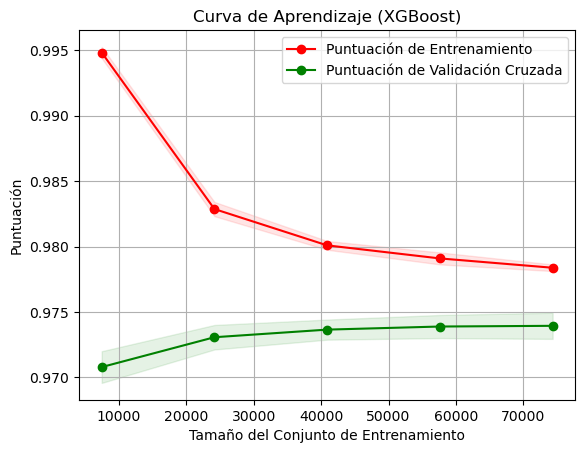

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Genera una curva de aprendizaje para evaluar si el modelo tiene sobreajuste.
    
    Parameters:
        estimator: Modelo de aprendizaje supervisado (clasificador o regresor)
        title: Título del gráfico
        X: Matriz de características
        y: Vector de etiquetas
        ylim: Tupla (ymin, ymax) para establecer los límites en el eje y
        cv: Estrategia de validación cruzada
        n_jobs: Número de núcleos CPU para calcular en paralelo (None para usar todos disponibles)
        train_sizes: Tamaños de conjunto de entrenamiento para los que se calcularán las puntuaciones de aprendizaje
    
    Returns:
        Gráfico de la curva de aprendizaje
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_SO, y_SO, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Validación Cruzada")

    plt.legend(loc="best")
    return plt

# Uso del código:
title = "Curva de Aprendizaje (XGBoost)"
estimator = XGBClassifier()
plot_learning_curve(estimator, title, X_train_SO, y_train_SO, cv=5, n_jobs=-1)

plt.show()


**Inferencia**

- Según la curva de aprendizaje obtenida la brecha disminuye a medida que aumenta el tamaño del conjunto de entrenamiento, lo que es una indicación de que el sobreajuste se está reduciendo.

## Conclusión sobre la Importancia de Detectar Casos de Diabetes

La detección temprana y precisa de casos de diabetes es fundamental para mejorar la calidad de vida de los pacientes, reducir los costos de atención médica y promover estilos de vida saludables. Algunas conclusiones clave en relación a las métricas obtenidas con nuestro modelo de predicción de diabetes son:

- **Mejora en la Calidad de Vida:** La detección temprana permite un manejo efectivo de la diabetes, reduciendo el riesgo de complicaciones graves y mejorando la calidad de vida.

- **Reducción de Costos:** Ayuda a reducir los costos asociados con tratamientos médicos intensivos y hospitalizaciones.

- **Promoción de Estilos de Vida Saludables:** La detección fomenta hábitos más saludables, como una alimentación adecuada y el ejercicio regular.

- **Prevención de Complicaciones:** Contribuye a prevenir o retrasar complicaciones de la enfermedad.

- **Identificación de Factores de Riesgo:** Permite identificar a personas en riesgo y aplicar medidas preventivas.

En relación a nuestro modelo, las métricas obtenidas, como la precisión, el recall y el F1-Score, indican su capacidad para detectar casos de diabetes. Estas métricas son esenciales para evaluar la eficacia del modelo y su utilidad en la práctica clínica.